In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2. Load the dataset into the tool

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Perform Below Visualizations.

Univariate Analysis

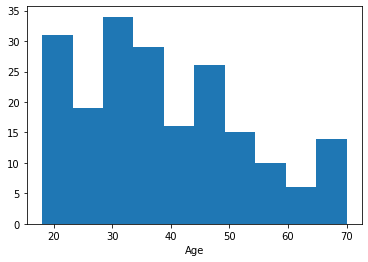

In [4]:
plt.hist(data['Age']);
plt.xlabel('Age');
plt.show();

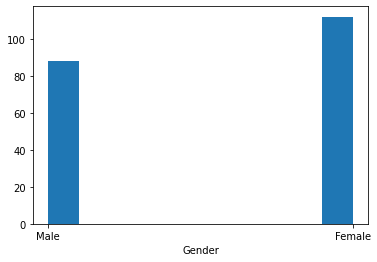

In [5]:
plt.hist(data['Gender']);
plt.xlabel('Gender');
plt.show();


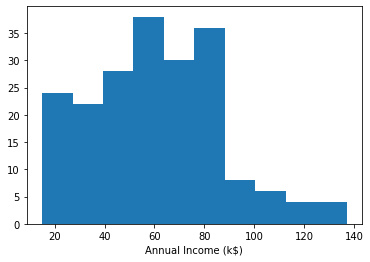

In [6]:
plt.hist(data['Annual Income (k$)']);
plt.xlabel('Annual Income (k$)');
plt.show();

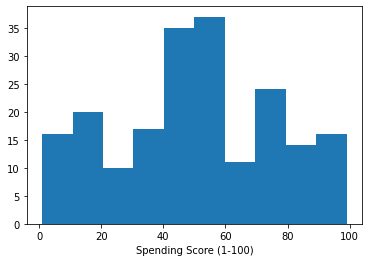

In [7]:
plt.hist(data['Spending Score (1-100)']);
plt.xlabel('Spending Score (1-100)');
plt.show();

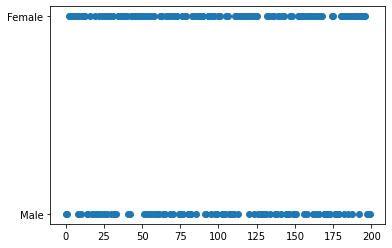

In [8]:
plt.scatter(data.index,data['Gender'])
plt.show()

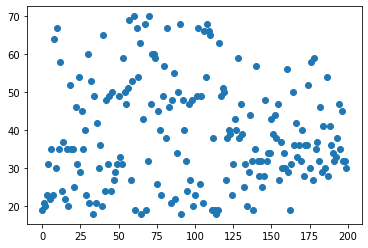

In [9]:
plt.scatter(data.index,data['Age'])

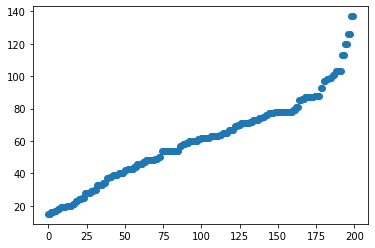

In [10]:
plt.scatter(data.index,data['Annual Income (k$)'])


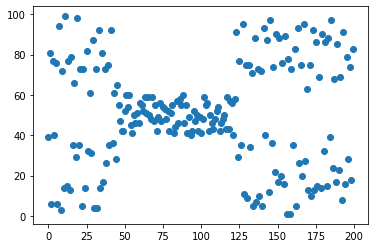

In [11]:
plt.scatter(data.index,data['Spending Score (1-100)'])

Bi- Variate Analysis

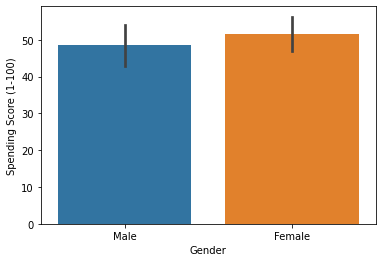

In [12]:
sns.barplot(x='Gender',y='Spending Score (1-100)',data=data)

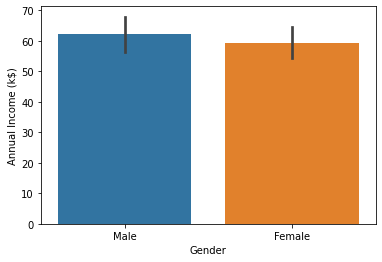

In [13]:
sns.barplot(x='Gender',y='Annual Income (k$)',data=data)

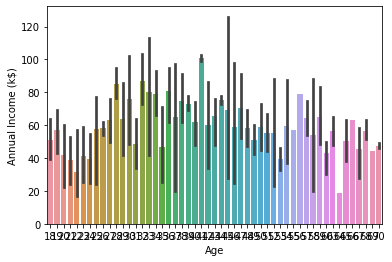

In [14]:
sns.barplot(x='Age',y='Annual Income (k$)',data=data)

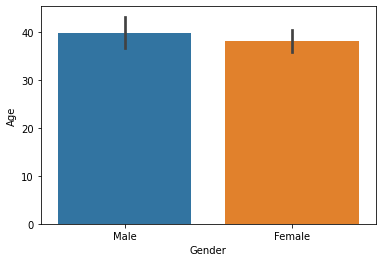

In [15]:
sns.barplot(x='Gender',y='Age',data=data)

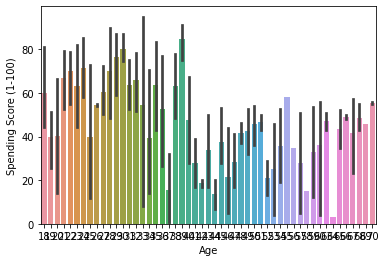

In [16]:
sns.barplot(x='Age',y='Spending Score (1-100)',data=data)

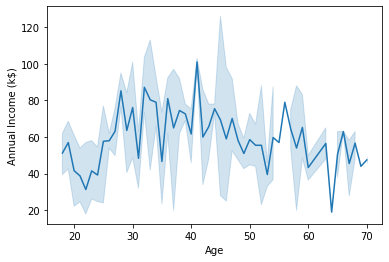

In [17]:
sns.lineplot(x=data["Age"], y=data["Annual Income (k$)"]);
plt.xlabel('Age');
plt.ylabel('Annual Income (k$)');
plt.show();

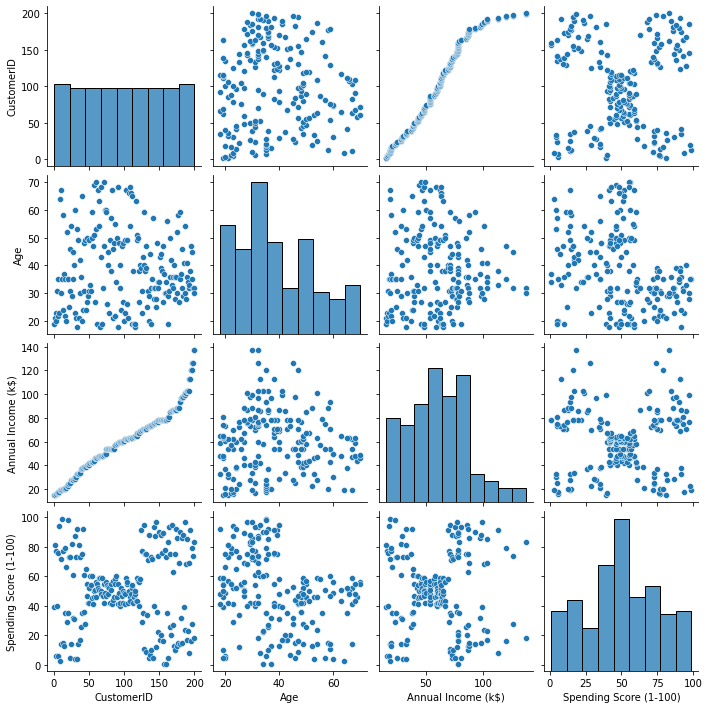

In [18]:
sns.pairplot(data)

Multi-Variate Analysis

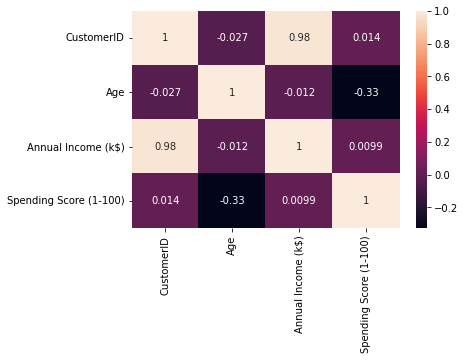

In [19]:
sns.heatmap(data.corr(), annot=True);

4. Perform descriptive statistics on the dataset.

In [20]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


5. Check for Missing values and deal with them.

In [21]:
data.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

6. Find the outliers and replace them outliers

In [22]:
data.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [23]:
data.drop('CustomerID',axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


7. Check for Categorical columns and perform encoding.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
# data['Gender']=le.fit_transform(data['Gender'])
data['Gender'].replace({'Male':1,"Female":0},inplace=True)

In [27]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


8. Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

9. Perform any of the clustering algorithms

In [29]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [30]:
kmeans.labels_

array([1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [31]:
kmeans.cluster_centers_

array([[162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513],
       [ 23.04166667,   0.41666667,  25.25      ,  25.83333333,
         76.91666667],
       [ 93.04615385,   0.43076923,  42.96923077,  57.93846154,
         49.44615385],
       [164.        ,   0.52777778,  40.80555556,  87.91666667,
         17.88888889],
       [ 35.47222222,   0.36111111,  45.19444444,  32.94444444,
         31.47222222]])

10. Add the cluster data with the primary dataset

In [32]:
data['Cluster']=kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4


11. Split the data into dependent and independent
variables.

In [33]:
x=data.drop('Cluster',axis=1)
y=data['Cluster']
x,y

(     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0             1       1   19                  15                      39
 1             2       1   21                  15                      81
 2             3       0   20                  16                       6
 3             4       0   23                  16                      77
 4             5       0   31                  17                      40
 ..          ...     ...  ...                 ...                     ...
 195         196       0   35                 120                      79
 196         197       0   45                 126                      28
 197         198       1   32                 126                      74
 198         199       1   32                 137                      18
 199         200       1   30                 137                      83
 
 [200 rows x 5 columns], 0      1
 1      1
 2      4
 3      1
 4      4
       ..
 195    0
 196    3
 197  

12. Split the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

13. Build the Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

14. Train the Model

In [36]:
model.fit(x_train,y_train)

RandomForestClassifier()

15. Test the Model

In [37]:
pred=model.predict(x_test)
pred

array([2, 1, 4, 3, 3, 2, 2, 3, 3, 1, 2, 3, 0, 2, 3, 0, 4, 3, 2, 2, 2, 4,
       3, 2, 2, 4, 2, 2, 0, 3, 1, 4, 4, 2, 3, 2, 0, 0, 3, 2], dtype=int32)

16. Measure the performance using Evaluation Metrics.

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,pred))

Accuracy: 0.975


In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))


[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 15  0  1]
 [ 0  0  0 11  0]
 [ 0  0  0  0  5]]


In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        11
           4       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.97      0.99      0.98        40
weighted avg       0.98      0.97      0.98        40

